##### License: Attribution 4.0 International (CC BY 4.0)

#### [https://creativecommons.org/licenses/by/4.0/](https://creativecommons.org/licenses/by/4.0/)

# CompBayes Report 2
### By Andrea Jackson

## Yuzhong's sock problem from Quiz 1

There are two drawers of socks. The first drawer has 40 white socks and 10 black socks; the second drawer has 20 white socks and 30 black socks. We randomly get 2 socks from a drawer, and it turns out to be a pair (same color) but we don't know the color of these socks. What is the chance that we picked the first drawer?

#### Hypothesis 1: Draw both socks from the first drawer
#### Hypothesis 2: Draw both socks from the second drawer
#### Data: Two socks of the same color are drawn 

In [1]:
from thinkbayes2 import *
from __future__ import division, print_function

pmf = Pmf() # creates an empty Pmf with no values

#### p(H) is the probability of the hypothesis before we see the data*

In [2]:
# create prior distributions for each hypothesis
pmf.Set('Hypo 1',0.5)
pmf.Set('Hypo 2',0.5)

In [3]:
pmf 

Pmf({'Hypo 1': 0.5, 'Hypo 2': 0.5})

#### p(D|H) is the probability of the data under the hypothesis, called the likelihood* 

#### The likelihood of drawing both socks of the same color from drawer 1 is (40/50)(39/49) + (10/50)(9/49)
#### The likelihood of drawing both socks of the same color from drawer 2 is (20/50)(19/49) + (30/50)(29/49)

In [4]:
# update the prior distributions by multiplying by the likelihoods
like_h1 = (40/50)*(39/49) + (10/50)*(9/49)
like_h2 = (20/50)*(19/49) + (30/50)*(29/49)

pmf.Mult('Hypo 1', like_h1)
pmf.Mult('Hypo 2', like_h2)

pmf 

Pmf({'Hypo 1': 0.33673469387755106, 'Hypo 2': 0.25510204081632654})

In [5]:
# renormalize the distribution 
pmf.Normalize() 

0.5918367346938775

In [6]:
'Hypo 1: ' + str(pmf.Prob('Hypo 1')) 

'Hypo 1: 0.568965517241'

In [7]:
'Hypo 2: ' + str(pmf.Prob('Hypo 2')) 

'Hypo 2: 0.431034482759'

### The chance that we picked two socks of the same color from the first drawer is about 0.569.

#### *definitions are directly from ThinkBayes Chapter 1

## Chess Problem from Quiz 1

Two identical twins are members of my chess club, but they never show up on the same day; in fact, they strictly alternate the days they show up.  I can't tell them apart except that one is a better player than the other:  Avery beats me 60% of the time and I beat Blake 70% of the time.  If I play one twin on Monday and win, and the other twin on Tuesday and lose, which twin did I play on which day?

##### Data
On Monday, you played chess with a twin and won. On Tuesday, you played chess with the other twin and lost.

##### Hypotheses

H1 - You played Blake on Monday and Avery on Tuesday.

H2 - You played Avery on Monday and Blake on Tuesday.

| Hypothesis    | Prior p(H)    | Likelihood       | Unnorm Post. |   Posterior       |
| ------------- |:-------------:|:----------------:|:------------:| ---------------:|
| H1            |   0.5         | (0.7)(0.6) = 0.42 |  (0.42)(0.5) = 0.21 | 0.21/0.27 = 0.78 |
| H2            | 0.5           | (0.4)(0.3) = 0.12 | (0.12)(0.5) = 0.06| 0.06/0.27 = 0.22|

### Answer: Hypothesis 1 has a higher probability than Hypothesis 2. Therefore, it is more likely that you played Blake on Monday and Avery on Tuesday. 

## The Kim Rhode problem

Exercise: At the 2016 Summer Olympics in the Women's Skeet event, Kim Rhode faced Wei Meng in the bronze medal match. They each hit 15 of 25 skeets, sending the match into sudden death. In the first round, both hit 1 of 2 skeets. In the next two rounds, they each hit 2 skeets. Finally, in the fourth round, Rhode hit 2 and Wei hit 1, so Rhode won the bronze medal, making her the first Summer Olympian to win an individual medal at six consecutive summer games.
But after all that shooting, what is the probability that Rhode is actually a better shooter than Wei? If the same match were held again, what is the probability that Rhode would win?

As always, you will have to make some modeling decisions, but one approach is to estimate, for each shooter, the probability of hitting a skeet. Then, to estimate the probability that Rhode is a better shooter, you can draw samples from the two posterior distributions and compare them. To estimate the probability of winning a rematch, you could draw samples from the posterior distributions and simulate a round of 25 shots.

### What is the probability that Rhode is actually a better shooter than Wei?

In [8]:
import numpy as np
import thinkplot

% matplotlib inline

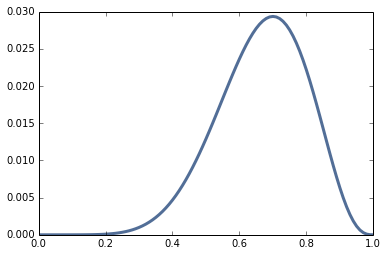

In [9]:
# estimate the probability of Rhode hitting a skeet
rhode_prior = Beta(8,4)
thinkplot.Pdf(rhode_prior.MakePmf())

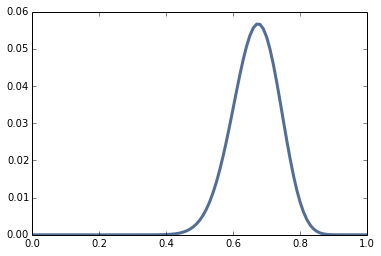

In [10]:
rhode_update = rhode_prior.Update((22, 11)) # update distribution with the number hits and misses
thinkplot.Pdf(rhode_prior.MakePmf())

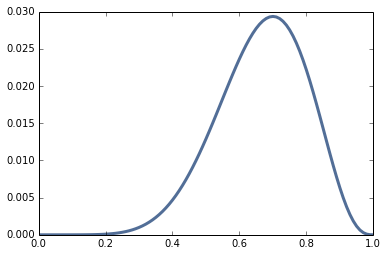

In [11]:
# estimate the probability of Meng hitting a skeet
wei_prior = Beta(8,4)
thinkplot.Pdf(wei_prior.MakePmf())

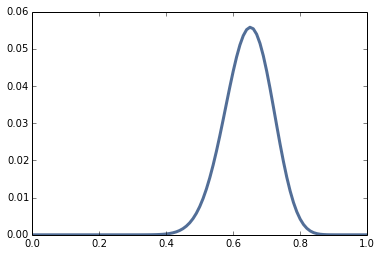

In [12]:
wei_update = wei_prior.Update((21, 12)) # update distribution with the number hits and misses
thinkplot.Pdf(wei_prior.MakePmf())

In [13]:
wei_prior.MakeCdf(10001).Sample(10000).max()

0.87329999999999997

In [14]:
# what is the probability that Rhode is actually a better shooter than Wei?

# rhode_sample and wei_sample are arrays of randomly drawn probabilities 
# from the posterior distribution of each player

# the probabilities represent the chance that a player will hit a skeet

rhode_sample = rhode_prior.MakeCdf(10001).Sample(10000) 
wei_sample = rhode_prior.MakeCdf(10001).Sample(10000)

In [15]:
# compare the randomly drawn probabilities by using numpy.mean
np.mean(rhode_sample > wei_sample)

0.49359999999999998

### The probability that Rhode is actually a better shooter than Wei is 0.504

### If the same match were held again, what is the probability that Rhode would win?

In [16]:
# for the binomial function, n represents the trials and p represents the probability of success 
# n = 25, the number of skeets to hit in a round
# rhode_sample contains the random probabilities of hitting a skeet 

rhode_rematch = np.random.binomial(25, rhode_sample)

#### In order for Rhode to win the match again, she must hit 22 or more skeets

In [17]:
wei_rematch = np.arange(10000) # create an array of the same length as rhode_rematch
wei_rematch.fill(22) # fill the array with 22

In [18]:
np.mean(rhode_rematch > wei_rematch)

0.013100000000000001

### The probability that Rhode would win a match held today is 0.0142

## Handedness of Twins BT Problem

10% of the world population is left-handed and, according to a 1996 Belgian study, about 21% of twins (both fraternal and identical) are left-handed. Twins make up 1.9% of the world population. 

Avery and Taylor are twins. If Avery is left-handed, what is the probability that Taylor is also left-handed? 


### Solution- using the table method

#### Hypotheses 

Make sure hypotheses are mutually exclusive and collectively exhaustive.

H1- Taylor is left-handed

H2- Taylor is right-handed

#### Data

Avery and Taylor are twins. Avery is left-handed.

| Hypothesis    | Prior p(H)    | Likelihood       | Unnorm Post. |   Posterior       |
| ------------- |:-------------:|:----------------:|:------------:| ---------------:|
| H1            |   0.1         | (0.019)(0.21) = 0.00399 |  (0.019)(0.21)(0.1) = 0.000399 | 0.000399/0.013908 = 0.0286 |
| H2            |   0.9         | (0.019)(0.79) = 0.01501 | (0.019)(0.79)(0.9) = 0.013509| 0.013509/0.013908 = 0.9713|

### The probability that Taylor is also left-handed is 0.0286 or 2.86%

#### References

[CNN Article about being left-handed](http://www.cnn.com/2015/11/03/health/being-left-handed-health-impact/)